# Bloque 03 - Unidad 02: Aprendizaje No Supervisado - Clustering y Reducción de Dimensionalidad

El aprendizaje no supervisado se enfoca en encontrar patrones ocultos en los datos sin etiquetas o resultados conocidos. En esta clase exploraremos tres técnicas clave de aprendizaje no supervisado: clustering (agrupamiento), asociación y reducción de dimensionalidad. El clustering busca agrupar puntos de datos similares, la asociación descubre relaciones entre variables, y la reducción de dimensionalidad reduce el número de características manteniendo la información relevante.

## Clustering K-means con Scikit-learn
En este ejemplo, vamos a utilizar datos ficticios de puntos en un espacio bidimensional y aplicar el algoritmo K-means para agruparlos.

Te sugerimos leer la [guia del usuario](https://scikit-learn.org/stable/modules/clustering.html#k-means)

,x,y,cluster,x_cluster,y_cluster
0,6.286511,0.000039,0,-0.097606,0.000486
1,993.394757,0.000042,1,1008.219072,0.000501
2,32.021133,0.001004,0,-0.097606,0.000486
3,1005.245006,0.000929,1,1008.219072,0.000501
4,-26.783469,-0.000007,0,-0.097606,0.000486


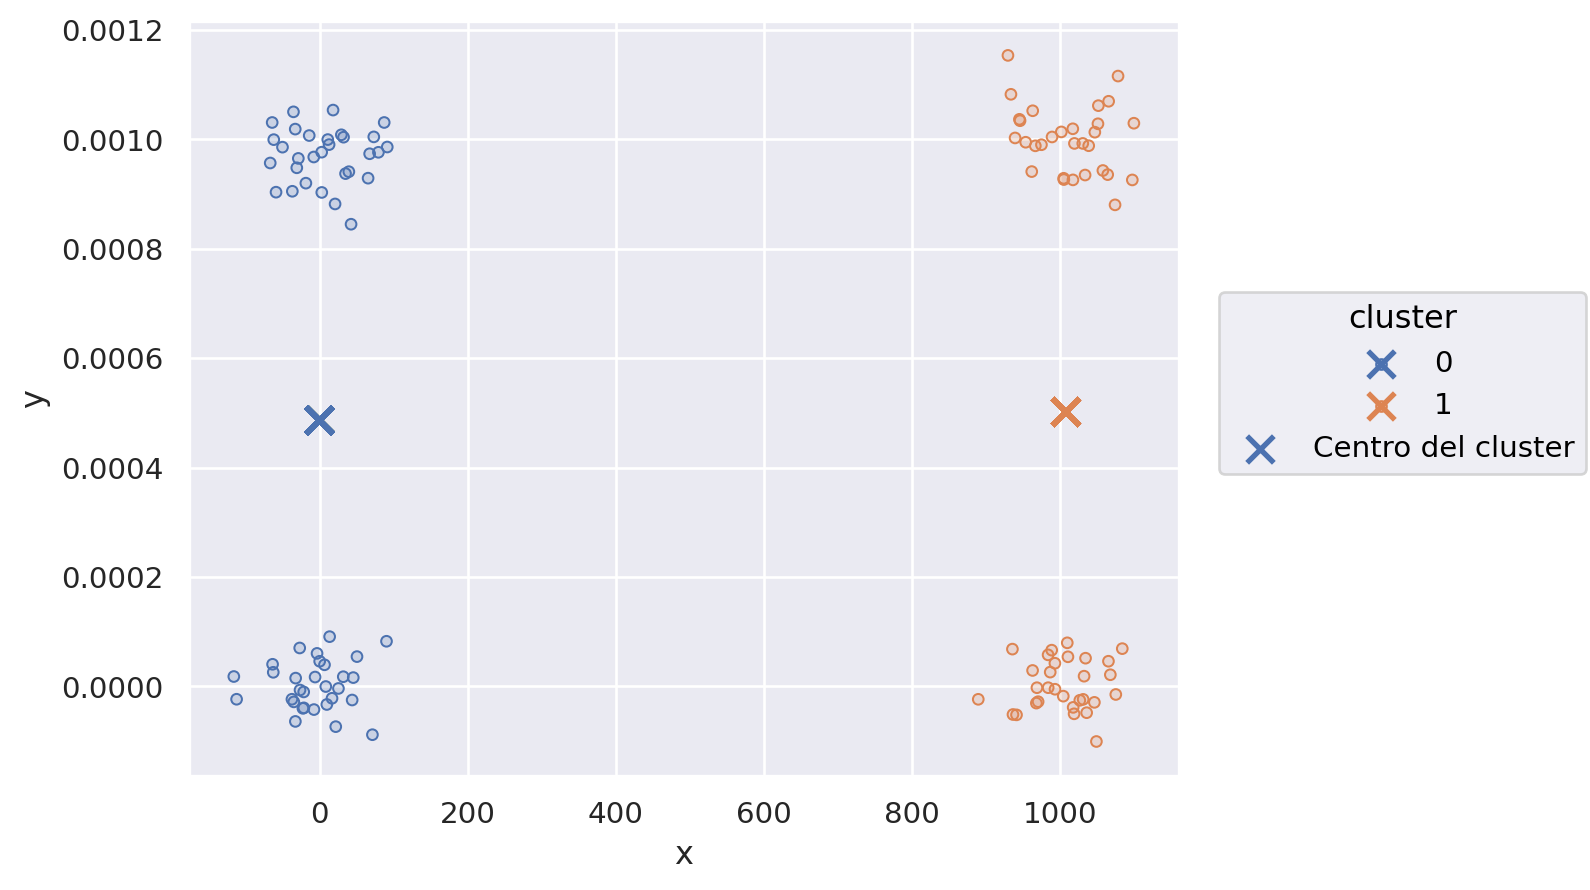

In [ ]:
import numpy as np
import pandas as pd
import seaborn.objects as so
from sklearn.cluster import KMeans

# Datos de ejemplo: puntos en un espacio 2D
scales = [1000, 0.001]  # ¿[mm, km]?

rng = np.random.default_rng(0)
N = 30

df = pd.DataFrame(
    {
        "x": scales[0] * rng.normal([0, 1, 0, 1], 0.05, size=[N, 4]).ravel(), #.ravel() cambia la dimension del array
        "y": scales[1] * rng.normal([0, 0, 1, 1], 0.05, size=[N, 4]).ravel(),
    }
)

# Inicializar el modelo K-means con 2 clusters
kmeans = KMeans(n_clusters=2)

# Ajustar el modelo a los datos
kmeans.fit(df)

# Predecir los clusters de los puntos
df["cluster"] = kmeans.predict(df)




**Para hacer**:

1. Leer la documentación de `KMeans` en Scikit-learn.
2. ¿Qué pasa si intercambias las "unidades" de `x` e `y`?
3. ¿Qué va a pasar si aumentas el número de clusters a 4? Probalo. ¿Y con `scales = [1, 1]`?
4. Hacé una predición distintos puntos en el plano y busca entender como se divide el plano según a que cluster se asigna.
5. ¿Qué podrías usar como *score* para estos datos?

**Para pensar en grupo**
1. ¿Son estables los clusters ante variaciones de los parámetros del método? ¿Cómo lo probarías?
2. ¿Son estables los clusters ante el ruido? ¿Cómo lo probarías?


,x,y,cluster,x_cluster,y_cluster
0,0.000006,39.379411,1,0.000499,2.502473
1,0.000993,42.203934,1,0.000499,2.502473
2,0.000032,1003.779681,0,0.000509,984.891125
3,0.001005,928.661307,0,0.000509,984.891125
4,-0.000027,-6.752255,1,0.000499,2.502473


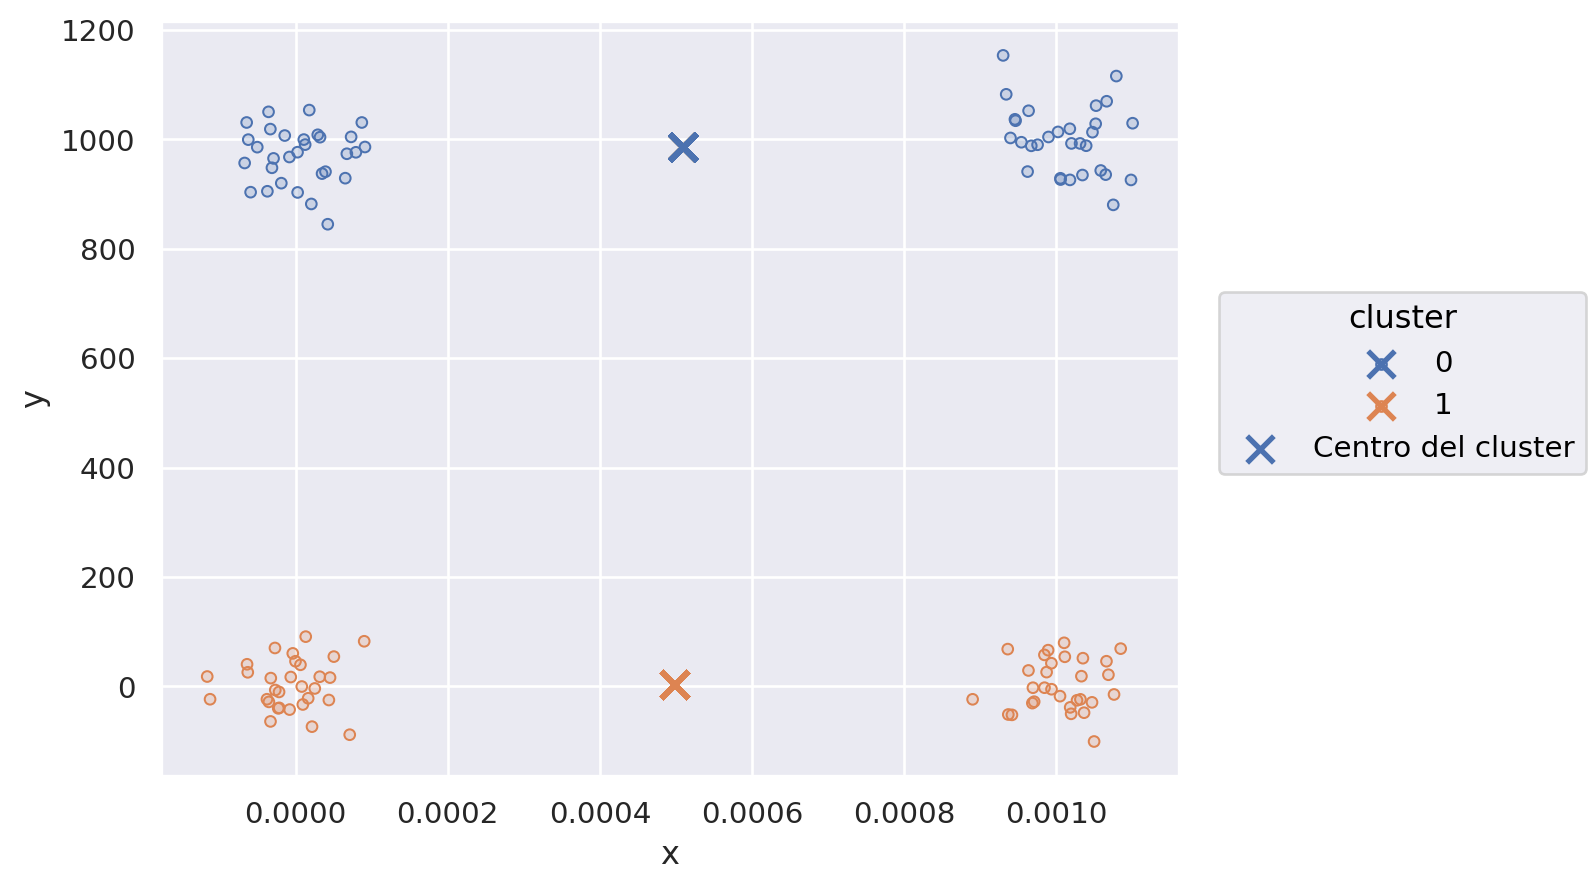

In [ ]:
#cambiamos las unidades
scales = [1000, 0.001]  # ¿[mm, km]?

rng = np.random.default_rng(0)
N = 30

df = pd.DataFrame(
    {
        "x": scales[1] * rng.normal([0, 1, 0, 1], 0.05, size=[N, 4]).ravel(), #.ravel() cambia la dimension del array
        "y": scales[0] * rng.normal([0, 0, 1, 1], 0.05, size=[N, 4]).ravel(),
    }
)

# Inicializar el modelo K-means con 2 clusters
kmeans = KMeans(n_clusters=2)

# Ajustar el modelo a los datos
kmeans.fit(df)

# Predecir los clusters de los puntos
df["cluster"] = kmeans.predict(df)

# Agregar los centros de los clusters
df = df.join(
    df["cluster"]
    .map(lambda x: kmeans.cluster_centers_[x])
    .apply(lambda x: pd.Series(x, index=["x_cluster", "y_cluster"]))
)

# Mostramos el DataFrame
display(df.head())

# Graficar los puntos y los centros de los clusters
(
    so.Plot(df, color="cluster")
    .scale(color=so.Nominal())
    .add(so.Dots(), x="x", y="y")
    .add(
        so.Dot(marker="x", stroke=2, pointsize=10),
        x="x_cluster",
        y="y_cluster",
        label="Centro del cluster",
    )
)

,x,y,cluster,x_cluster,y_cluster
0,6.286511,0.000039,0,37.947383,0.000550
1,993.394757,0.000042,1,966.575931,0.000490
2,32.021133,0.001004,0,37.947383,0.000550
3,1005.245006,0.000929,1,966.575931,0.000490
4,-26.783469,-0.000007,2,-38.142596,0.000422


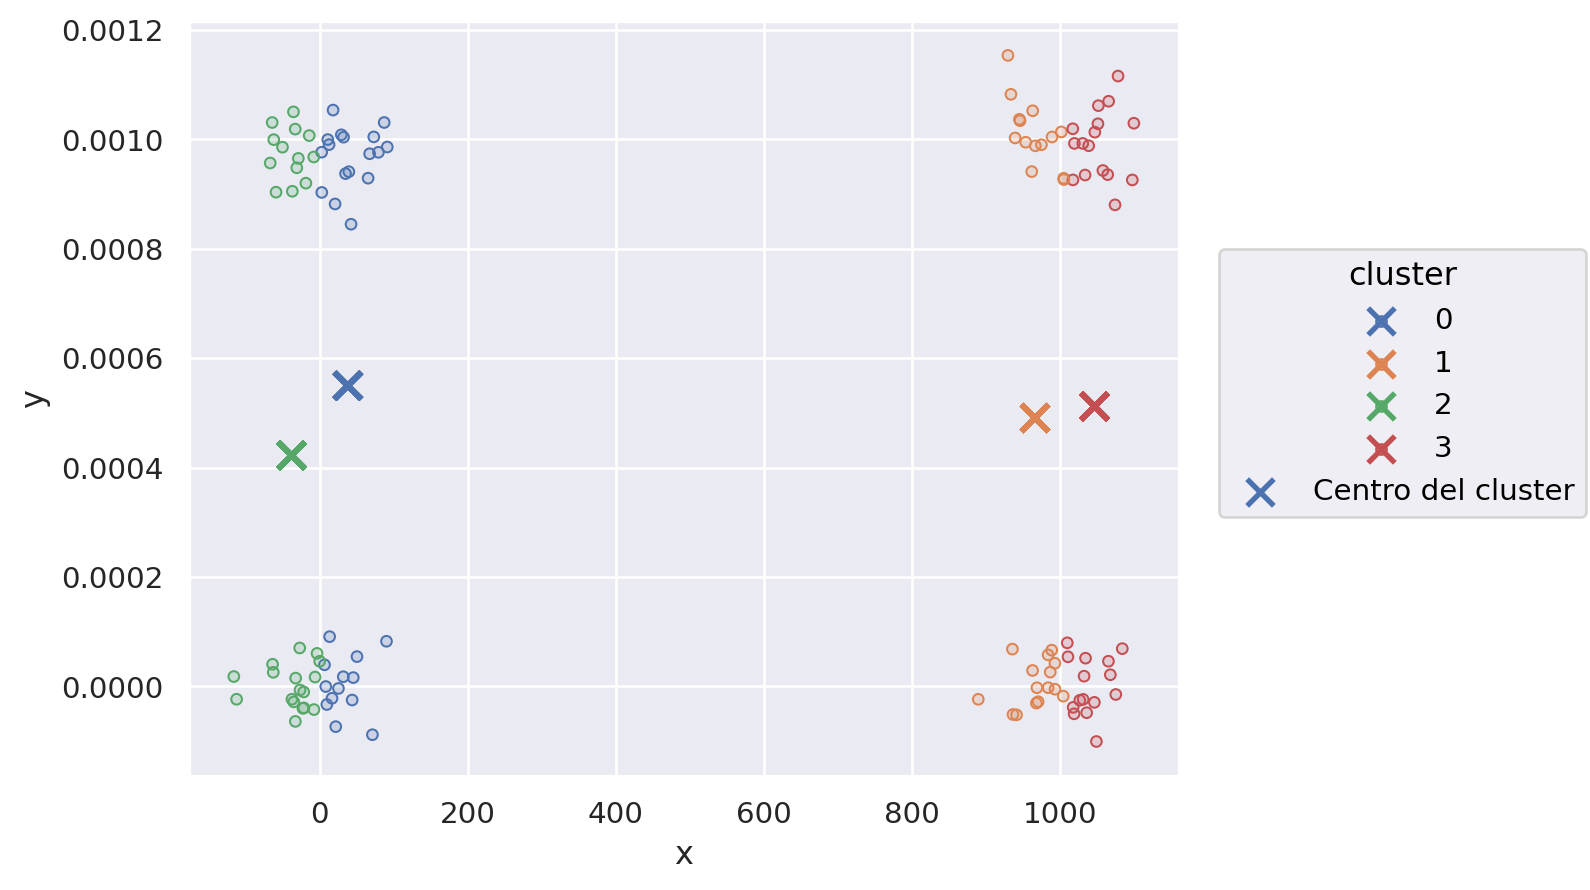

In [ ]:
#cambiamos los clusters a 4
scales = [1000, 0.001]  # ¿[mm, km]?

rng = np.random.default_rng(0)
N = 30

df = pd.DataFrame(
    {
        "x": scales[0] * rng.normal([0, 1, 0, 1], 0.05, size=[N, 4]).ravel(), #.ravel() cambia la dimension del array
        "y": scales[1] * rng.normal([0, 0, 1, 1], 0.05, size=[N, 4]).ravel(),
    }
)

# Inicializar el modelo K-means con 2 clusters
kmeans = KMeans(n_clusters=4)

# Ajustar el modelo a los datos
kmeans.fit(df)

# Predecir los clusters de los puntos
df["cluster"] = kmeans.predict(df)

# Agregar los centros de los clusters
df = df.join(
    df["cluster"]
    .map(lambda x: kmeans.cluster_centers_[x])
    .apply(lambda x: pd.Series(x, index=["x_cluster", "y_cluster"]))
)

# Mostramos el DataFrame
display(df.head())

# Graficar los puntos y los centros de los clusters
(
    so.Plot(df, color="cluster")
    .scale(color=so.Nominal())
    .add(so.Dots(), x="x", y="y")
    .add(
        so.Dot(marker="x", stroke=2, pointsize=10),
        x="x_cluster",
        y="y_cluster",
        label="Centro del cluster",
    )
)

,x,y,cluster,x_cluster,y_cluster
0,0.006287,0.039379,0,-0.006705,0.002246
1,0.993395,0.042204,2,1.004105,0.002758
2,0.032021,1.003780,3,0.006509,0.969791
3,1.005245,0.928661,1,1.012333,0.999991
4,-0.026783,-0.006752,0,-0.006705,0.002246


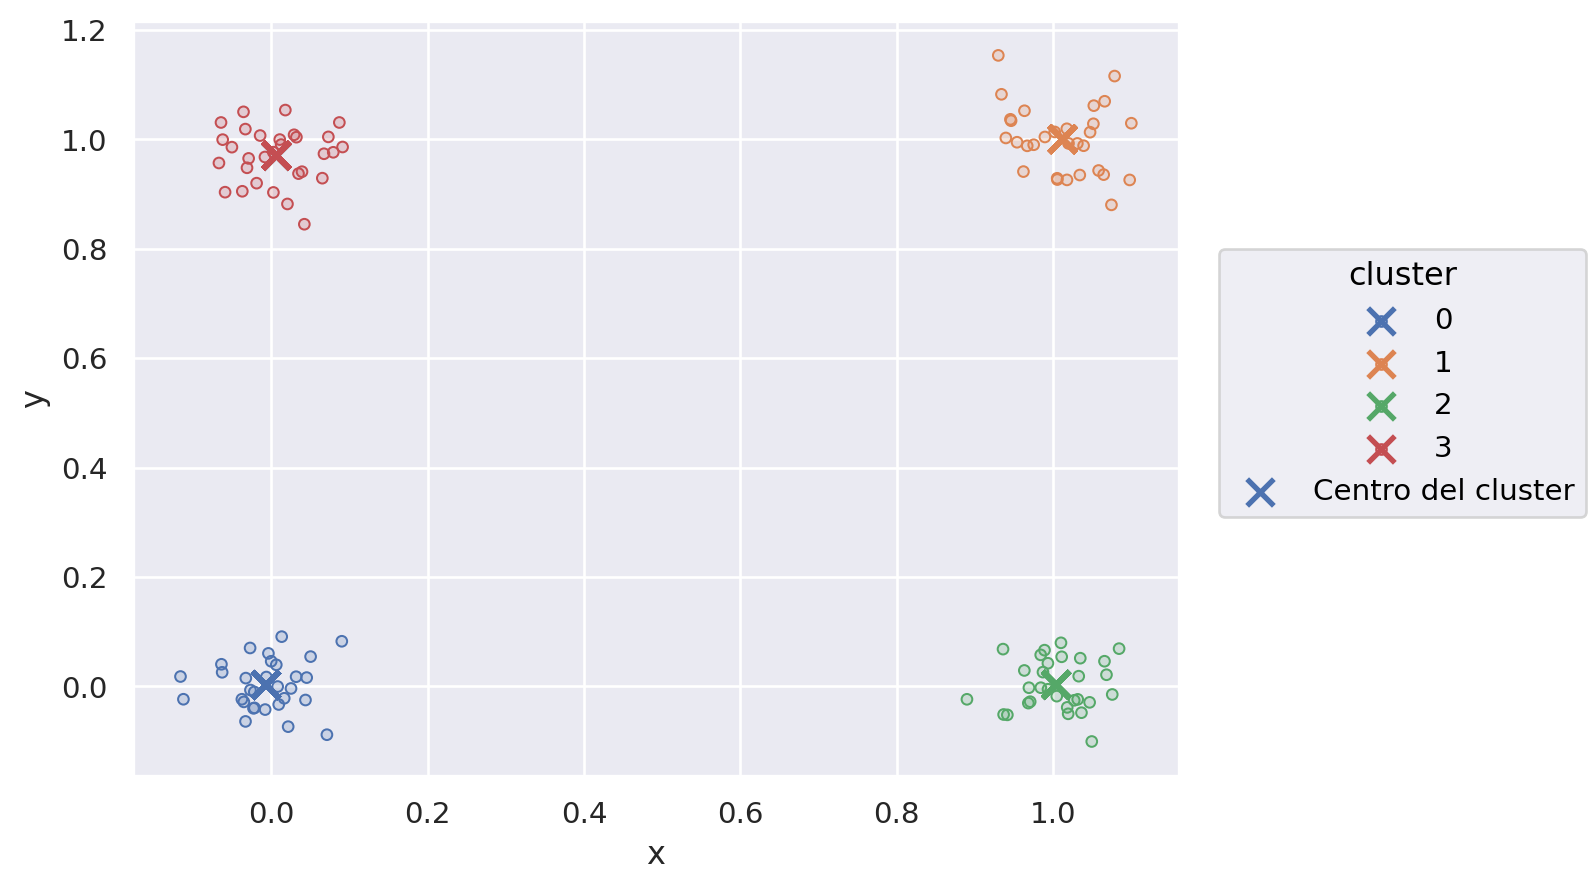

In [ ]:
#cambiamos los clusters a 4 y las escalas a [1,1]
scales = [1, 1]  # ¿[mm, km]?

rng = np.random.default_rng(0)
N = 30

df = pd.DataFrame(
    {
        "x": scales[0] * rng.normal([0, 1, 0, 1], 0.05, size=[N, 4]).ravel(), #.ravel() cambia la dimension del array
        "y": scales[1] * rng.normal([0, 0, 1, 1], 0.05, size=[N, 4]).ravel(),
    }
)

# Inicializar el modelo K-means con 2 clusters
kmeans = KMeans(n_clusters=4)

# Ajustar el modelo a los datos
kmeans.fit(df)

# Predecir los clusters de los puntos
df["cluster"] = kmeans.predict(df)

# Agregar los centros de los clusters
df = df.join(
    df["cluster"]
    .map(lambda x: kmeans.cluster_centers_[x])
    .apply(lambda x: pd.Series(x, index=["x_cluster", "y_cluster"]))
)

# Mostramos el DataFrame
display(df.head())

# Graficar los puntos y los centros de los clusters
(
    so.Plot(df, color="cluster")
    .scale(color=so.Nominal())
    .add(so.Dots(), x="x", y="y")
    .add(
        so.Dot(marker="x", stroke=2, pointsize=10),
        x="x_cluster",
        y="y_cluster",
        label="Centro del cluster",
    )
)

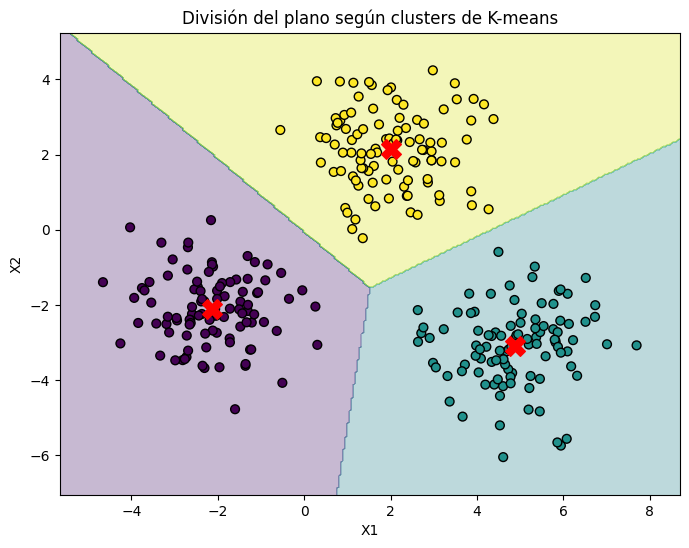

In [ ]:
#Hacé una predicción distintos puntos en el plano y busca entender como se divide el plano según a que cluster se asigna.
#revisar este grafico
import matplotlib.pyplot as plt

# 1. Generar datos de ejemplo
np.random.seed(0)
X = np.vstack([
    np.random.randn(100, 2) + np.array([2, 2]),
    np.random.randn(100, 2) + np.array([-2, -2]),
    np.random.randn(100, 2) + np.array([5, -3]),
])

# 2. Entrenar k-means con k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

# 3. Crear rejilla de puntos en el plano
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

grid_points = np.c_[xx.ravel(), yy.ravel()]

# 4. Predecir el cluster para cada punto de la rejilla
labels = kmeans.predict(grid_points)
labels = labels.reshape(xx.shape)

# 5. Visualizar
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, labels, alpha=0.3, cmap='viridis')

# Dibujar puntos originales
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=40, cmap='viridis', edgecolor='k')

# Dibujar centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X')

plt.title('División del plano según clusters de K-means')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
#voronoy


In [ ]:
#pensar las preguntas

## Reducción de Dimensionalidad PCA (Análisis de Componentes Principales) con Scikit-learn
En este ejemplo, vamos a utilizar datos ficticios de múltiples características para reducirlos a 2 dimensiones utilizando PCA.

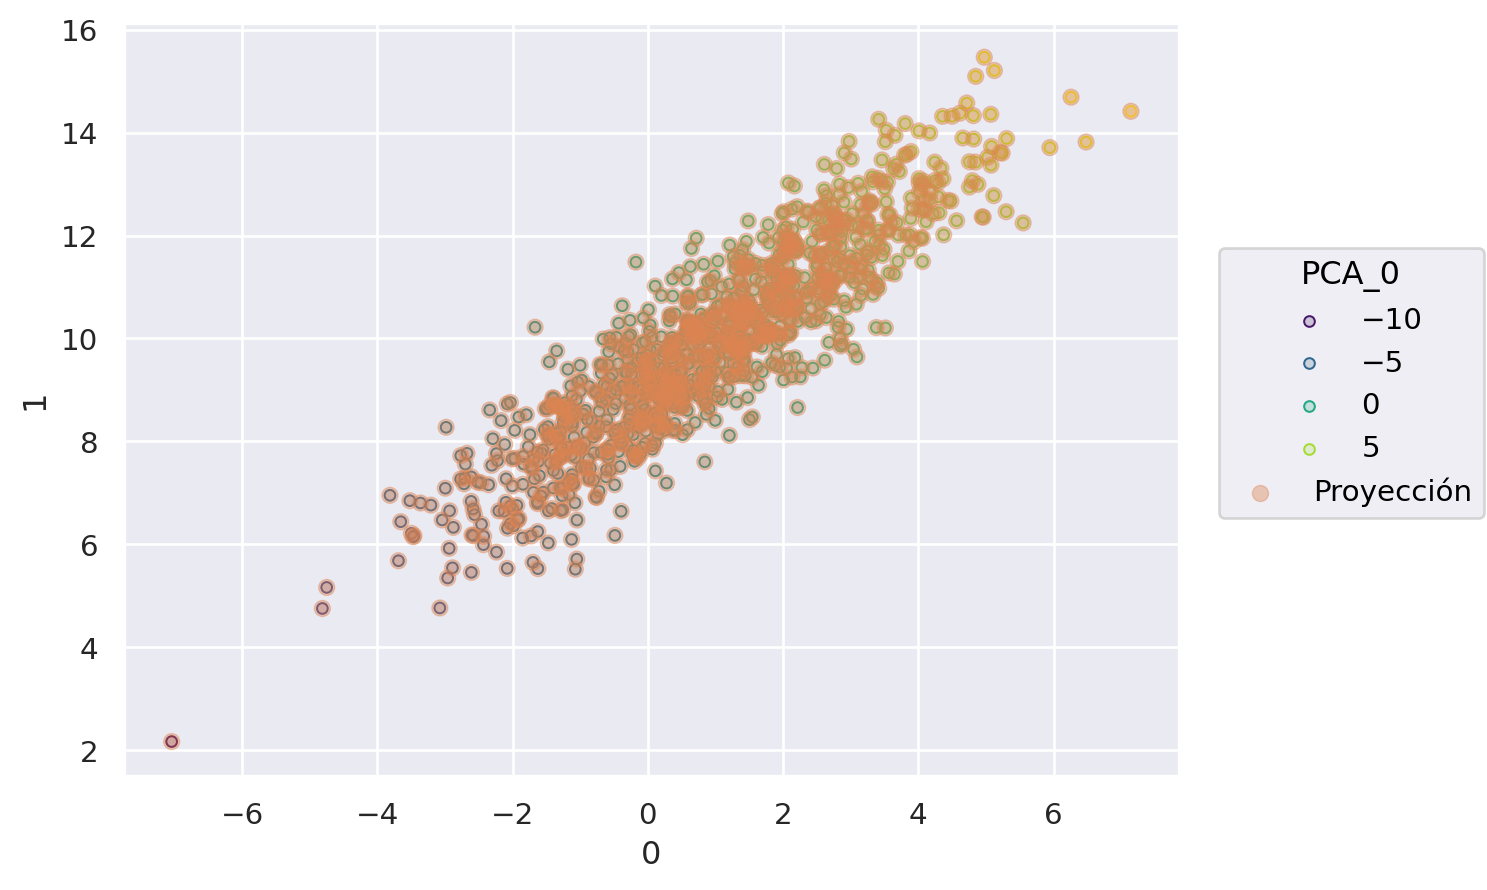

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Datos de ejemplo: puntos en un espacio de 2 dimensiones
rng = np.random.default_rng()

promedios = [1, 10]

desv_est = [2, 2]
correlacion = 0.9
covarianza = correlacion * desv_est[0] * desv_est[1]

matriz_de_convarianza = [
    [desv_est[0] ** 2, covarianza],
    [covarianza, desv_est[1] ** 2],
]

X = pd.DataFrame(rng.multivariate_normal(promedios, matriz_de_convarianza, size=1_000)) #"extension" de distribucion normal a vectores aleatorios (en R**n)

# Inicializar el modelo PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)

# Ajustar y transformar los datos
X_reducido = pca.fit_transform(X)
X = X.join(pd.DataFrame(X_reducido).add_prefix("PCA_"))

# Proyectar las componentes al subespacio de PCA
proyeccion = pca.inverse_transform(X.filter(like="PCA_"))
X = X.join(proyeccion.add_prefix("proyeccion_"))


# Graficar los puntos transformados en 2D
(
    so.Plot(X)
    .scale(color="viridis")
    .add(so.Dots(), x=0, y=1, color="PCA_0")
    .add(so.Dot(color="C1",alpha=0.4), x="proyeccion_0", y="proyeccion_1", label="Proyección")
)

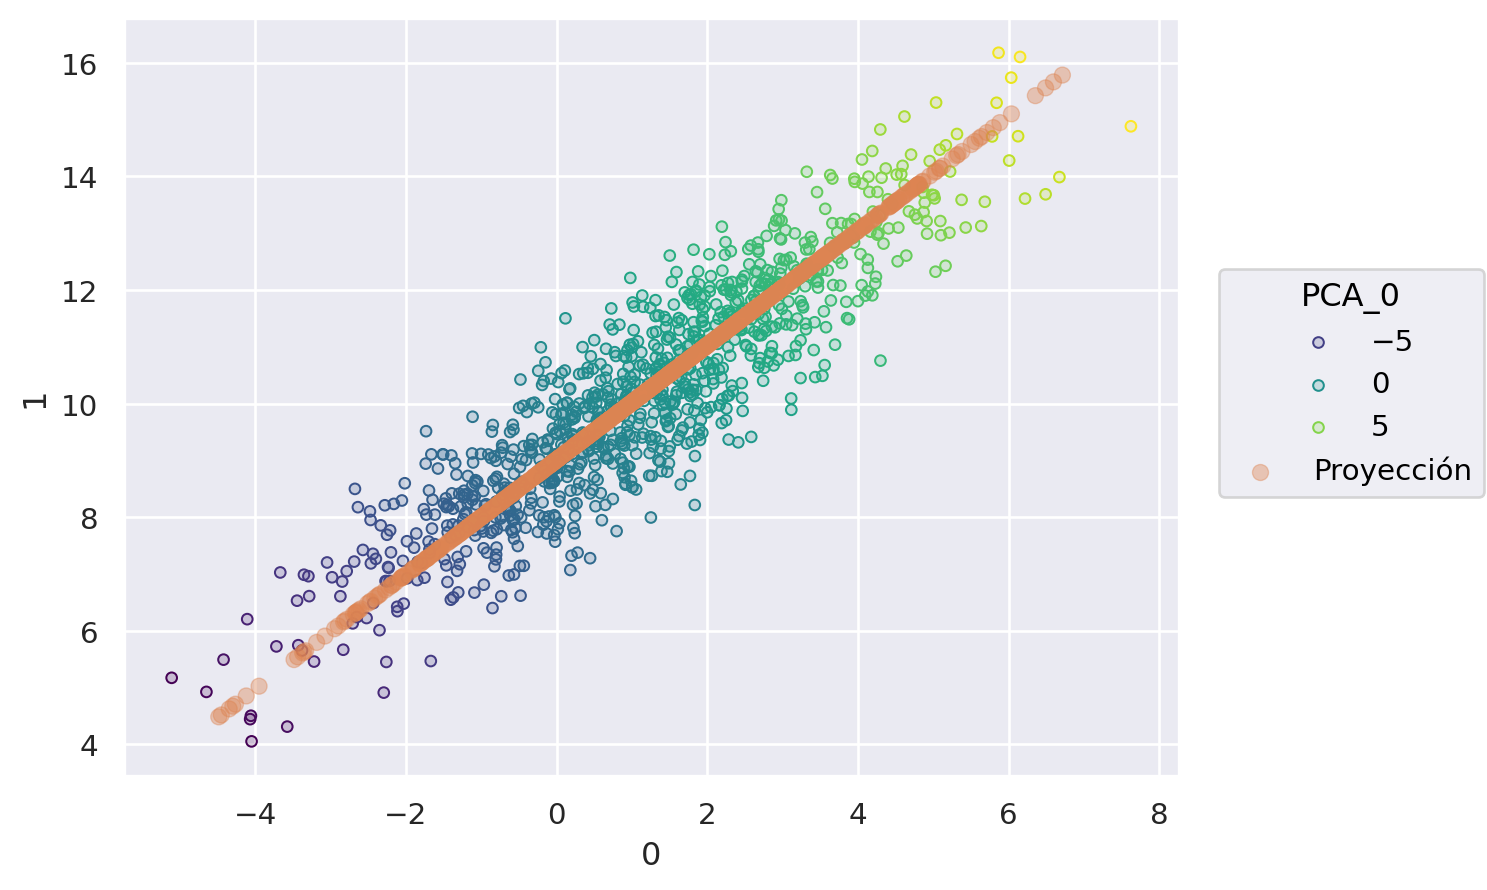

In [ ]:
#disminuimos a una dimension y aca queda clara la proyeccion sobre el nuevo eje

# Datos de ejemplo: puntos en un espacio de 2 dimensiones
rng = np.random.default_rng()

promedios = [1, 10]

desv_est = [2, 2]
correlacion = 0.9
covarianza = correlacion * desv_est[0] * desv_est[1]

matriz_de_convarianza = [
    [desv_est[0] ** 2, covarianza],
    [covarianza, desv_est[1] ** 2],
]

X = pd.DataFrame(rng.multivariate_normal(promedios, matriz_de_convarianza, size=1_000)) #"extension" de distribucion normal a vectores aleatorios (en R**n)

# Inicializar el modelo PCA para reducir a 2 dimensiones
pca = PCA(n_components=1)

# Ajustar y transformar los datos
X_reducido = pca.fit_transform(X)
X = X.join(pd.DataFrame(X_reducido).add_prefix("PCA_"))

# Proyectar las componentes al subespacio de PCA
proyeccion = pca.inverse_transform(X.filter(like="PCA_"))
X = X.join(proyeccion.add_prefix("proyeccion_"))


# Graficar los puntos transformados en 2D
(
    so.Plot(X)
    .scale(color="viridis")
    .add(so.Dots(), x=0, y=1, color="PCA_0")
    .add(so.Dot(color="C1",alpha=0.4), x="proyeccion_0", y="proyeccion_1", label="Proyección")
)

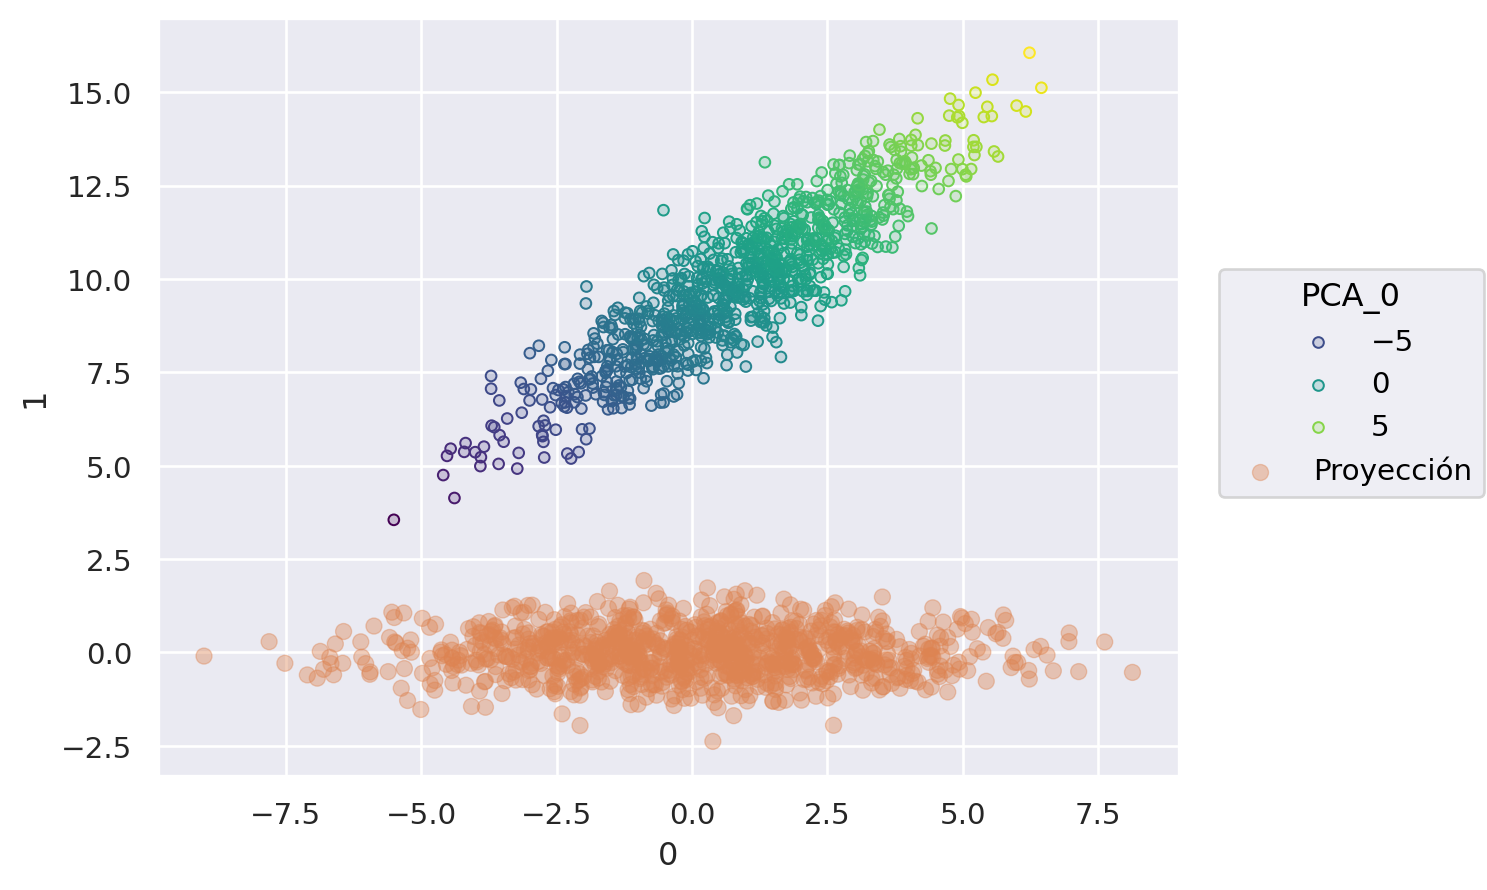

In [ ]:
#grafico ahora "transformando los ejes"->cambio de base
# Datos de ejemplo: puntos en un espacio de 2 dimensiones
rng = np.random.default_rng()

promedios = [1, 10]

desv_est = [2, 2]
correlacion = 0.9
covarianza = correlacion * desv_est[0] * desv_est[1]

matriz_de_convarianza = [
    [desv_est[0] ** 2, covarianza],
    [covarianza, desv_est[1] ** 2],
]

X = pd.DataFrame(rng.multivariate_normal(promedios, matriz_de_convarianza, size=1_000)) #"extension" de distribucion normal a vectores aleatorios (en R**n)

# Inicializar el modelo PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)

# Ajustar y transformar los datos
X_reducido = pca.fit_transform(X)
X = X.join(pd.DataFrame(X_reducido).add_prefix("PCA_"))

# Proyectar las componentes al subespacio de PCA
proyeccion = pca.inverse_transform(X.filter(like="PCA_"))
X = X.join(proyeccion.add_prefix("proyeccion_"))


# Graficar los puntos transformados en 2D
(
    so.Plot(X)
    .scale(color="viridis")
    .add(so.Dots(), x=0, y=1, color="PCA_0")
    .add(so.Dot(color="C1",alpha=0.4), x="PCA_0", y="PCA_1", label="Proyección")
)

**Para hacer**:

1. Leer la documentación de PCA en Scikit-learn.
2. Calcula la varianza explicada por cada componente. ¿Que significa?
3. Variar la correlacción (`corr = ...`) de los datos generados. ¿Qué sucede con la proyección?
4. Variar el número de componentes `PCA(n_components=...)`. ¿Qué sucede con la proyección?

**Para pensar en grupo**:

1. ¿Que significado tienen las componentes principales?
2. ¿Son estables ante el ruido? ¿Y ante *outliers*? ¿Cómo lo probarías?
3. ¿Por qué es importante estandarizar los datos antes de aplicar PCA?

In [ ]:
#calculamos la varianza explicada por cada componente
varianza_explicada=pca.explained_variance_ratio_
for i in range(len(varianza_explicada)):
  print(f"Varianza explicada por el componente {i+1}: {varianza_explicada[i]*100}%")

Varianza explicada por el componente 1: 95.00743377344804%
Varianza explicada por el componente 2: 4.992566226551965%


In [ ]:
#observacion, cuando reducimos una dimension más, nos quedamos con la de mayor varianza explicada
#ante outliders seguro que no pues usa varianza
#estables ante ruido no se
#si no estandarizas gana siempre el de mayor escala

## Clustering de Clientes de un Mayorista

Este conjunto de datos contiene información sobre los gastos anuales de clientes de un mayorista en diferentes categorías de productos, como frescos, leche, comestibles y detergentes.

https://archive.ics.uci.edu/ml/datasets/wholesale+customers


**Para hacer:**
1. Cargá el conjunto de datos de **Clientes de un mayorista** desde el UCI Machine Learning Repository.
2. Describí las columnas y los tipos de datos utilizando el método .info(). Revisá si hay valores faltantes y corregí los tipos de datos si es necesario.
3. Curaduría de los datos: Eliminá o imputá los valores faltantes y asegurate de que las características estén en el formato adecuado.
4. Explorá las características. ¿Qué variables creés que pueden ayudar a agrupar clientes? ¿Cuáles pueden ser redundantes?
5. Visualizá los datos utilizando gráficos de dispersión y correlaciones entre las variables. Identificá posibles grupos dentro de los datos.
6. Aplicá el algoritmo K-means con un número de clusters que creas apropiado.
7. Visualizá los grupos generados y evaluá la calidad del clustering.

In [1]:
url="https://archive.ics.uci.edu/static/public/292/wholesale+customers.zip"
df=pd.read_csv(url)
df

NameError: name 'pd' is not defined

In [ ]:
df.info() #todo divino  #podria ver outliers pero no lo voy a hacer #metodo por cuantiles

In [ ]:
#asumo que region y canal?¿

In [ ]:
#hagamos graficos
import seaborn as sns
matriz_correlaciones=df.corr()
sns.heatmap(matriz_correlaciones,annot=True)

In [ ]:
#ploteemos las cada dato contra todos
df_normalizado=(df-df.mean())/df.std() #son poison ponele, conviene otra normalizacion
sns.pairplot(df_normalizado, hue="Channel")


**Para discutir en grupo**:

1. Interpretá que es cada cluster.
2. ¿Es el óptimo el número de clusters?

## Reducción de Dimensionalidad de datos de dígitos manuscritos.

El conjunto de datos MNIST (imágenes de dígitos manuscritos) contiene imágenes en escala de grises de dígitos manuscritos (0-9) de 28x28 píxeles, con un total de 70,000 imágenes.

https://www.kaggle.com/c/digit-recognizer



**Para hacer:**
1. Descargá el conjunto de datos de **MNIST (imágenes de dígitos manuscritos)** desde Kaggle:
2. Describí las columnas y los tipos de datos utilizando .info(). Revisá si hay datos faltantes y verificá que los tipos de datos sean correctos.
3. Curaduría de los datos: Si es necesario, eliminá o imputá valores faltantes y corregí los tipos de datos.
4. Explorá las características. Observá si algunas variables tienen poca variación o pueden ser eliminadas sin perder información relevante.
5. Visualizá los datos reduciendo las dimensiones a 2 usando PCA y graficando los datos en dos dimensiones.

**Para discutir en grupo**:

1. ¿Cuánto varía la calidad de los datos con menos dimensiones?
2. Proba reducir aún más las dimensiones y observá cómo cambia la interpretación de los datos.